# Diamond Price Modelling

 **What are diamonds ?**

> Diamond is a solid form of the element carbon with its atoms arranged in a crystal structure called diamond cubic.
The most familiar uses of diamonds today are as gemstones used for adornment, and as industrial abrasives for cutting hard materials.



 **In this notebook, we will try to build a model to predict the prices of diamonds based on various features of diamond  like carat weight, cut quality ,etc.**
 
*Dataset used in this notebook has been taken from [KAGGLE](https://www.kaggle.com/competitions/shai-ml/data)*

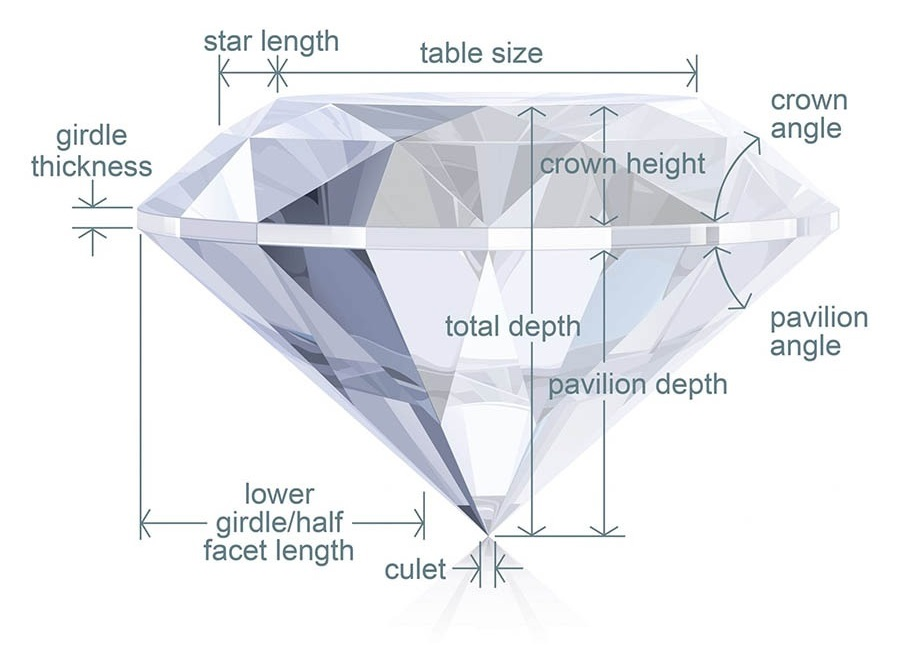

### Features of the Dataset

- **Carat** weight of the diamond
- **cut** Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal - - - **color** Color of the diamond, with D being the best and J the worst
- **clarity** How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
- **depth** The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- **table** The width of the diamond's table expressed as a percentage of its average diameter
- **price** the price of the diamond
- **x** length mm
- **y** width mm
- **z** depth mm

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


***
# 1- Get the Data
***

In [ ]:
# Read the Data (train - test )
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submit = pd.read_csv('/content/sample_submission.csv')

***
# 2- Discover and visualize the data
***

## A- Data discovery

**Check the head of diamond(train - test), and check out its info() and describe() methods.**

In [ ]:
# Show first 5 rows
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [ ]:
# Show first 5 rows
test.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10900 non-null  int64  
 1   carat       10900 non-null  float64
 2   cut         10900 non-null  object 
 3   color       10900 non-null  object 
 4   clarity     10900 non-null  object 
 5   depth       10900 non-null  float64
 6   table       10900 non-null  float64
 7   x           10900 non-null  float64
 8   y           10900 non-null  float64
 9   z           10900 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 851.7+ KB


In [ ]:
train.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
test.describe()

,Unnamed: 0,carat,depth,table,x,y,z
count,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000
mean,27806.405688,0.801794,61.762532,57.526844,5.757932,5.759811,3.555975
std,15880.940837,0.443401,1.422198,2.210543,1.077961,1.069891,0.669389
min,1.000000,0.230000,52.200000,50.100000,0.000000,0.000000,0.000000
25%,14044.500000,0.410000,61.000000,56.000000,4.790000,4.800000,2.970000
50%,27911.500000,0.700000,61.900000,57.000000,5.680000,5.690000,3.520000
75%,40898.250000,1.130000,62.600000,59.000000,6.700000,6.690000,4.130000
max,53938.000000,2.500000,71.600000,73.000000,8.800000,8.890000,5.580000


## B- Data visualization

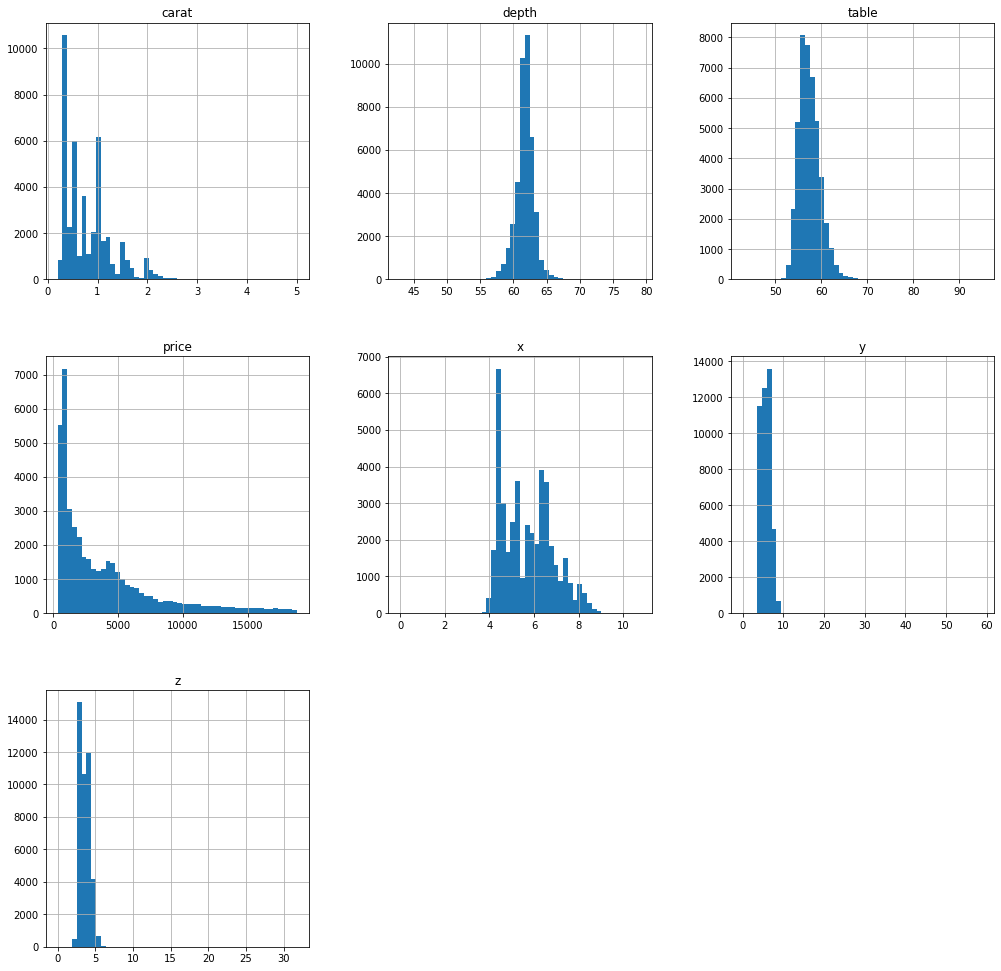

In [ ]:
#ploting histogram on train dataset to get an idea of the features inside the data
train.drop('Unnamed: 0',axis=1).hist(bins=50,figsize=(17,17))
plt.show()

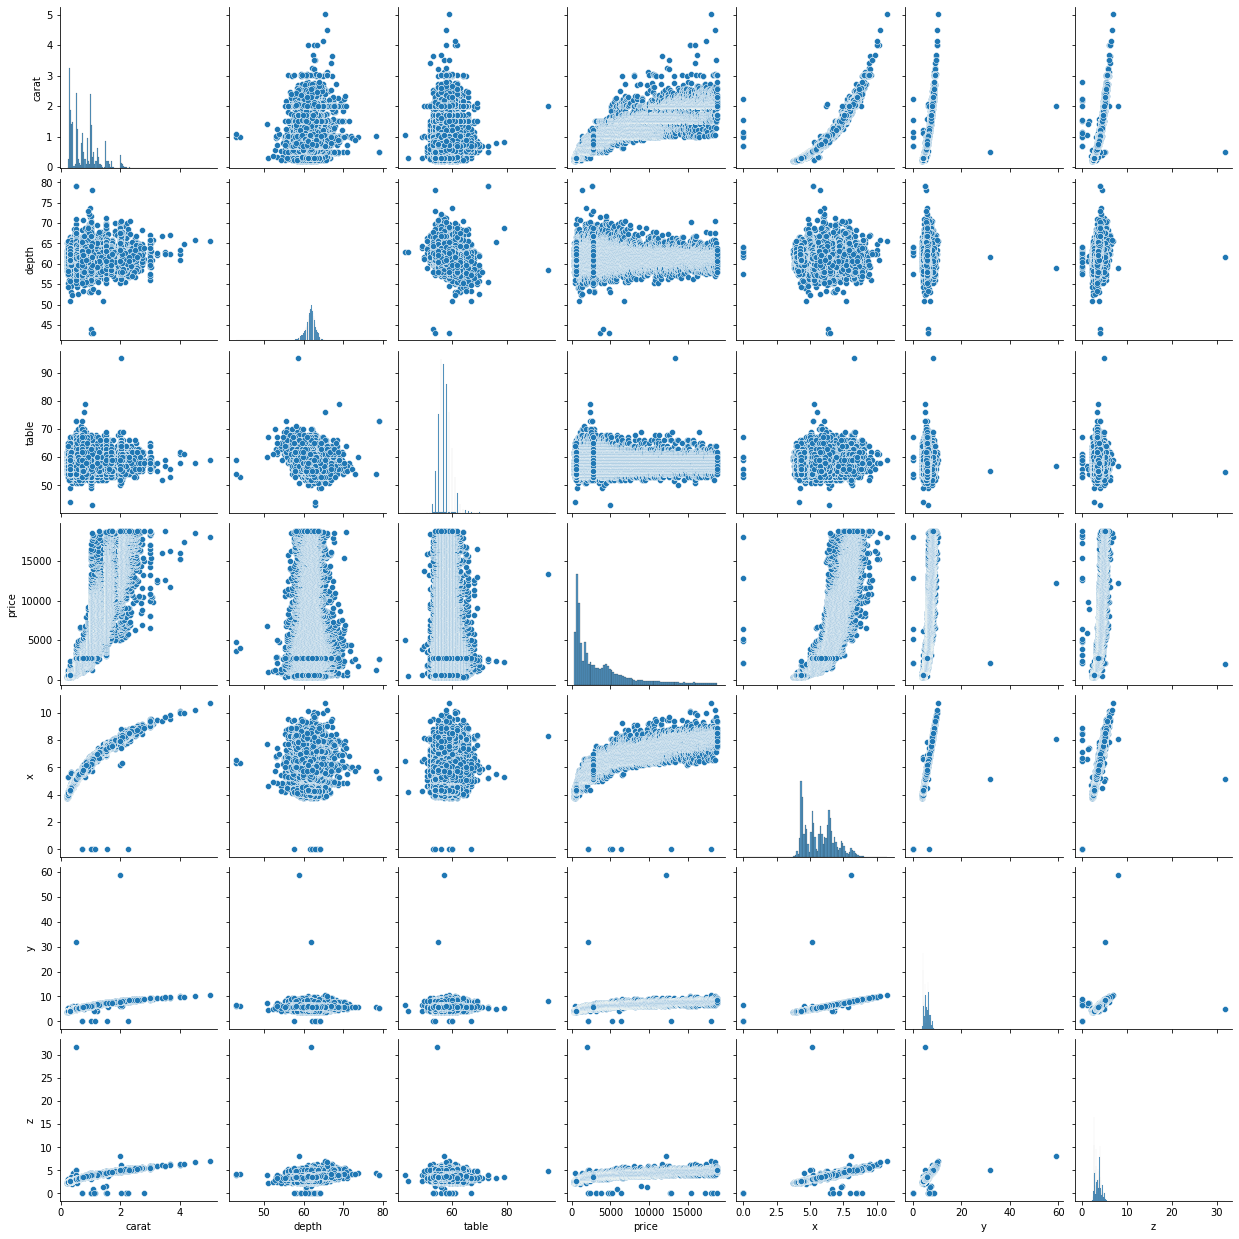

In [ ]:
#Analysing train data by examaning a pairplot  
ax = sns.pairplot(train.drop('Unnamed: 0',axis=1))

- **Carat**

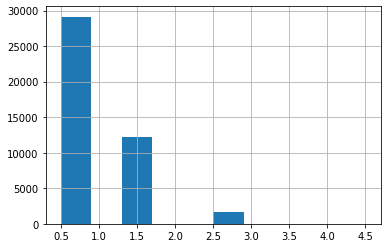

In [ ]:
train["carat_cat"] = pd.cut(train["carat"], bins=[0, 1, 2, 3, 4, np.inf], labels=[0.5, 1.5, 2.5, 3.5, 4.5])
train["carat_cat"].hist()
train.drop('carat_cat',axis=1,inplace=True)

In [ ]:
(len(train[train['carat'] > 3 ]) / len(train)) * 100

0.07434944237918216

diamonds that weight is bigger than 3 are small percentage to be apparent in the plot

Text(0.5, 1.0, 'carat by prices')

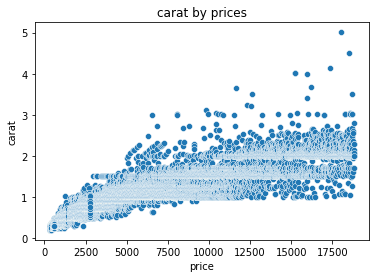

In [ ]:
ax = sns.scatterplot(data = train, x = 'price', y = 'carat')
plt.title('carat by prices')

it's clear that the carat is linearly correlated with price

In [ ]:
weight_price =train.groupby('carat')['price'].mean()

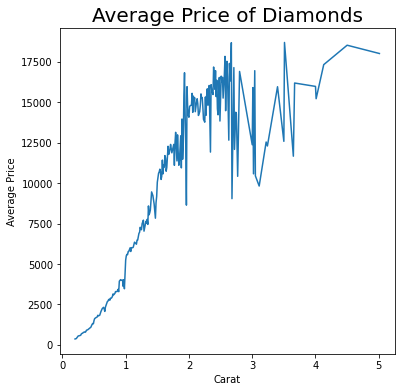

In [ ]:
plt.figure(figsize=(6,6))
sns.lineplot(x=weight_price.index,y=weight_price.values)
plt.xlabel('Carat')
plt.ylabel('Average Price')
plt.title('Average Price of Diamonds', size=20);

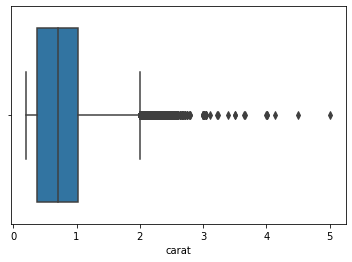

In [ ]:
sns.boxplot(data = train ,x='carat')
plt.show()

In [ ]:
(len(train[train['carat'] > 2 ]) / len(train)) * 100

3.856877323420074

there are about 4% of train data outliers . we will deal with that later 

- cut

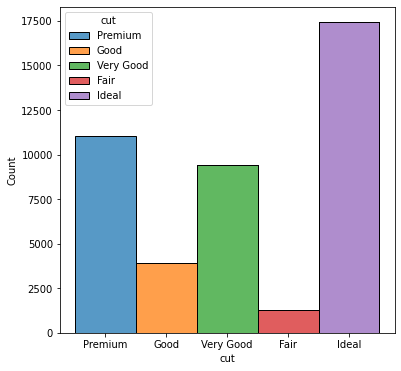

In [ ]:
plt.figure(figsize = (6,6))
sns.histplot(data = train ,x = 'cut' , hue = 'cut' , multiple="stack")
plt.show()

In [ ]:
train.cut.value_counts()

Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64

the most cut in the diamonds is ideal then premium . it's obvious that the diamond should be cut perfectly according to the data  

In [ ]:
px.histogram(train, x='cut',y='price', barmode='group',title=" Total Price of Quality of the cut ")

total price of diamonds ( Ideal cut ) is the most followed by ( Premium ) . it's ensure that if the degree of cut is higher , the higher the price . 

- Color

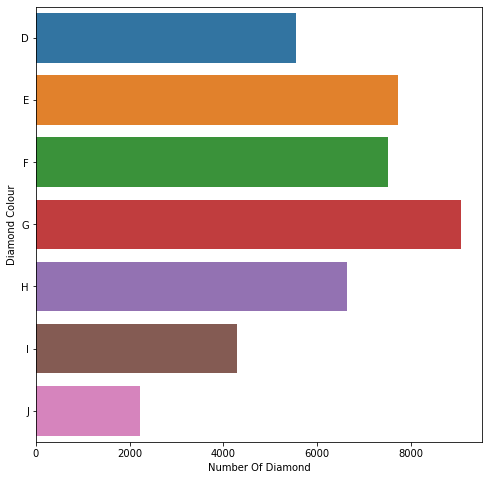

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x=train['color'].value_counts().values,y=train['color'].value_counts().index,order=['D','E','F','G','H','I','J'])
plt.ylabel('Diamond Colour')
plt.xlabel('Number Of Diamond');

In [ ]:
train['color'].value_counts()

G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64

diamond colour from J (worst) to D (best) .although the D is the best color but the most selling is the ( G ) followed by ( E )

In [ ]:
px.histogram(train, x='cut',y='price',color='color', barmode='group',title="Total Price of Quality of the cut according to it's color")

The above Plot show that the higher total price of every quality cut is the ( G ) Color ensuring that it's the most selling 

- clarity

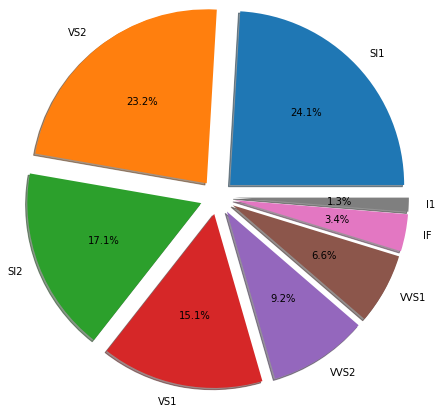

In [ ]:
plt.pie(train['clarity'].value_counts().values, labels= train['clarity'].value_counts().index, explode= [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2],
        autopct='%1.1f%%', shadow=True, radius= 2)
plt.show() 

In [ ]:
train['clarity'].value_counts()

SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64

> Calrity is measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) .
- the most selling is ( SI1 - VS2 - SI2 - VS1 ) percentage of total selling diamonds ( 79.5% )
- the clearest diamond ( IF - VVS1 - VVS2 ) have lowest percentage of total selling diamonds (19.2% ).
- the lowest clearness ( I1 ) has lowest percentage of total selling diamonds ( 1.3% ).

In [ ]:
px.histogram(train, x='clarity',y='price', barmode='group',title="Total Price of each Clarity")

> Calrity is measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) .
- the most selling is ( SI1 - VS2 - SI2 - VS1 ) about 142.7M .
- the clearest diamond ( IF - VVS1 - VVS2 ) have selling about 24.16M.
- the lowest clearness ( I1 ) has selling about 2.32M.

- Features ['x','y', 'z', 'table', 'depth']

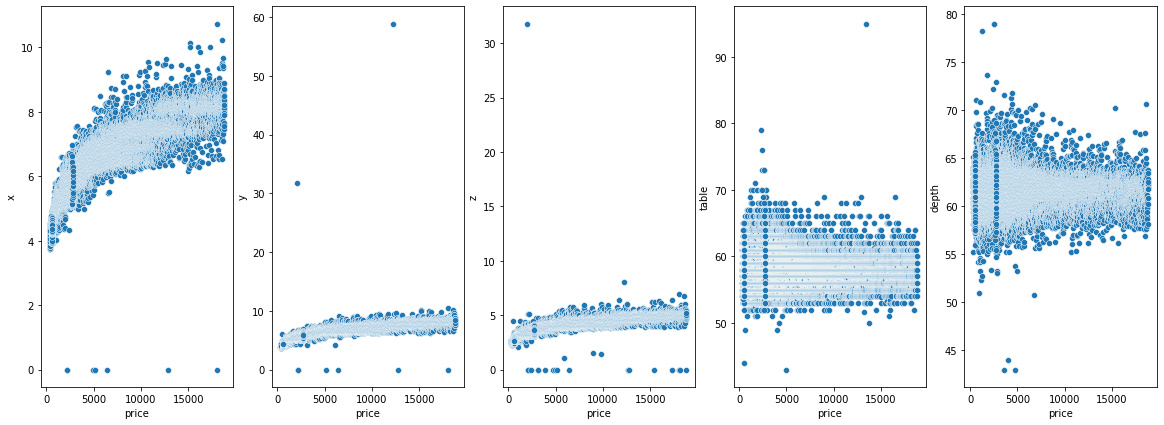

In [ ]:
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = train, x = train['price'], y = train[i], ax = axs[c])
    c+=1

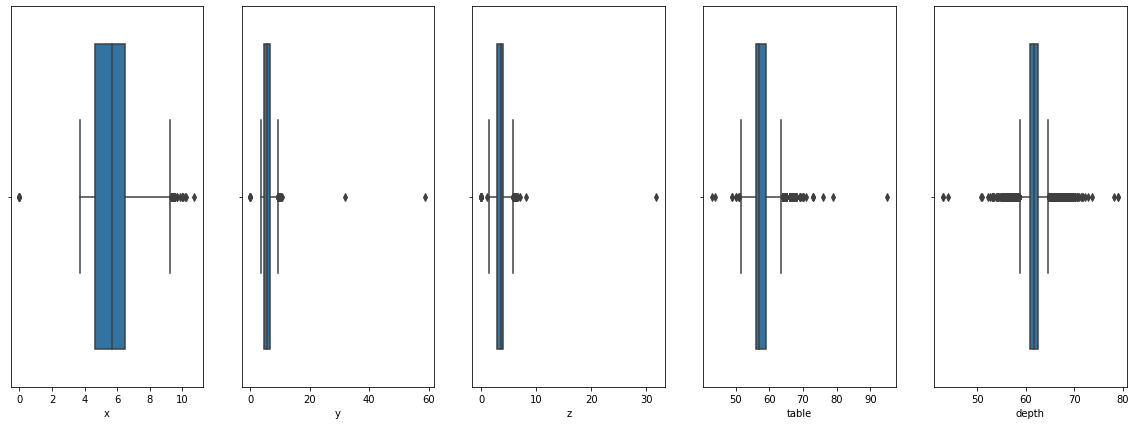

In [ ]:
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.boxplot(data = train, x = train[i], ax = axs[c])
    c+=1

there are some outliers that we are goining to deal with later

> Capping the columns:
- x only values that are < 9.2
- y only values that are < 30
- z only values that are < 30
- table only values that are < 75 and > 45
- depth only values that are < 75 and > 45

## C- Correlation

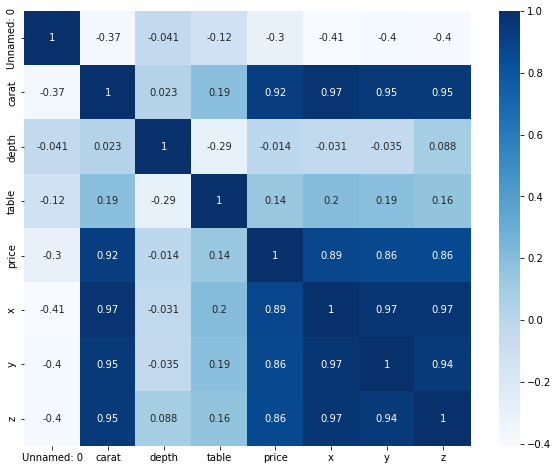

In [ ]:
corr_matrix = train.corr()

plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "Blues")
plt.show()

In this heatmap we can see that:


*   carrat is the main feature that is highly corrolated.
*   the depth and the table are weakly corrolated.


*   x, y and z are corrolated to the price.






# Conclusion
1- Carat is correlated linearly with the price

2- Most diamonds is ideally cut then Premiumly. The higher degree of cut ,The higher the price .

3- Color is important as if the color is D (which is unique ) it increase the price of the diamonds unlike color J ( which is acceptable ) as we can see an Slight yellow tints if we look from Multiple angles

4- Clarity measurement of how clear the diamond is (IF >> didn't Contain impurities to I1 >> Contains impurities visible to the naked eye )